In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
#Lets make sure we have the latest version of fastai
#%pip install -Uqq fastai
%pip install -Uqq duckduckgo_search

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 51.7 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
#Side proj for imdb sentiment dataset.
#from fastdownload import FastDownload
#d = FastDownload()
#path = d.get('https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz')

In [1]:
#Lets import everything we need from fastai
#from fastai.vision.all import * 

#Lets set the path to extrct our data to the images folder
#path = untar_data(URLs.PETS)/'images'

# We need a way to label our images as dogs or cats. 
# In this dataset, pictures of cats are given a filename that starts with a capital letter:
#def is_cat(x): return x[0].isupper()
#end cat learner
##################################
#Bear, teddy bears and black bear model
# Run this after you have completed the above.
from duckduckgo_search import DDGS 
from fastcore.all import *

def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')






In [3]:
# Now we can create our DataLoaders:
#dls = ImageDataLoaders.from_name_func('.',
    #get_image_files(path), valid_pct=0.2, seed=42,
    #label_func=is_cat,
    #item_tfms=Resize(192))
#end cat learner
##################################

#Bear searches
urls = search_images('grizzly bear', max_images=150)
#ims = results.attrgot('contentUrl')
urls[0]
len(urls)

150

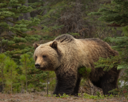

In [4]:
from fastdownload import download_url
dest = 'grizzly.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(128,128)



In [5]:

#bear_types = 'grizzly','black bear','teddy'
#path = Path('bears')



bear_types = 'grizzly','polar'
path = Path('bears')

for o in bear_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    time.sleep(5)
    resize_images(path/o, max_size=400, dest=path/o)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [6]:
fns = get_image_files(path)
fns

(#213) [Path('bears/polar/93ddb5b8-218a-44ec-a410-a391bbb86429.jpg'),Path('bears/polar/8ec97957-7679-4e6d-b692-37683dff76d5.jpg'),Path('bears/polar/25cff50d-fe1c-488d-a078-3e7915f9467d.jpg'),Path('bears/polar/db0c38c6-fa5d-43dd-b20b-e573dc86da68.jpg'),Path('bears/polar/b0018dd3-aeac-4088-a91b-f7ccf448db28.jpg'),Path('bears/polar/aec45ae8-4989-42ff-b1c2-e9a03055f767.jpg'),Path('bears/polar/2d8e5b6f-0a4f-4b6d-bfa2-bc6099831f3c.jpg'),Path('bears/polar/216d3587-2db4-49d7-8487-280868202fd1.JPG'),Path('bears/polar/37f736f1-c5e6-4a69-b51c-89249f929c9f.jpg'),Path('bears/polar/441a1a2e-89c1-4b1a-a83f-d7e904be36f1.jpg'),Path('bears/polar/ccbc0003-3c71-4530-b8ac-9930637fb706.jpg'),Path('bears/polar/c7c8ec6a-d66f-453a-852c-143ec241206d.jpeg'),Path('bears/polar/96f8b7f4-626e-4afe-a689-1184705d99f8.jpg'),Path('bears/polar/3c922e1a-1c84-4bef-9823-c6bfc196f9bb.jpg'),Path('bears/polar/43f546ae-a2d3-48ec-8be1-c1bf77124723.jpg'),Path('bears/polar/08990bc4-d5f3-47fe-9d54-46c1dc9a4380.jpg'),Path('bears/pol

In [7]:
failed = verify_images(fns)
failed

failed.map(Path.unlink);

#??verify_images

In [8]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

##  data block API ##
#The independent variable is the thing we are using to make predictions from,
#and the dependent variable is our target. In this case, our independent variables are images(ImageBlock), 
#and our dependent variables are the categories (type of bear, aka CategoryBlock) for each image. 
#We will see many other types of block in the rest of this book.

In [9]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)


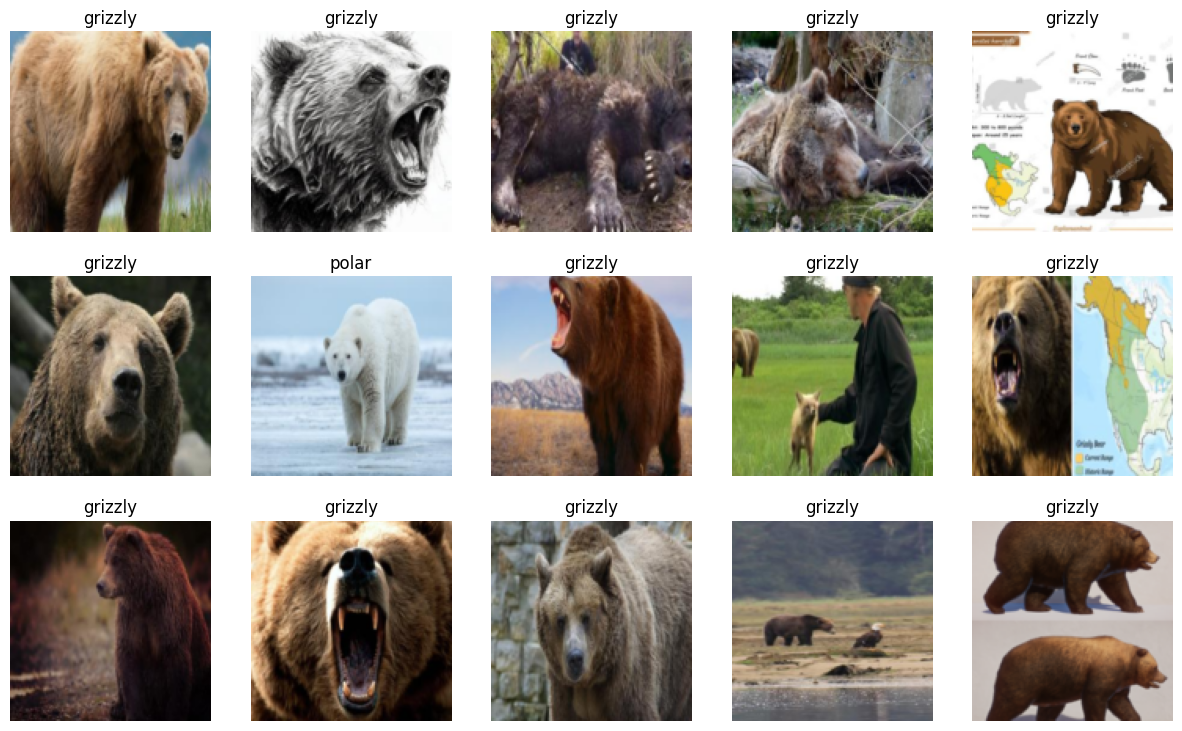

In [10]:
dls.valid.show_batch(max_n=15, nrows=3)

In [11]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [12]:
# train our model, a resnet18 (to keep it small and fast):
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)
#end cat learner
##################################

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 177MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.469701,0.207445,0.100000,00:27


epoch,train_loss,valid_loss,error_rate,time
0,0.872068,0.205559,0.050000,00:36
1,0.756610,0.200312,0.100000,00:37
2,0.604883,0.262843,0.125000,00:37
3,0.507911,0.240621,0.125000,00:36


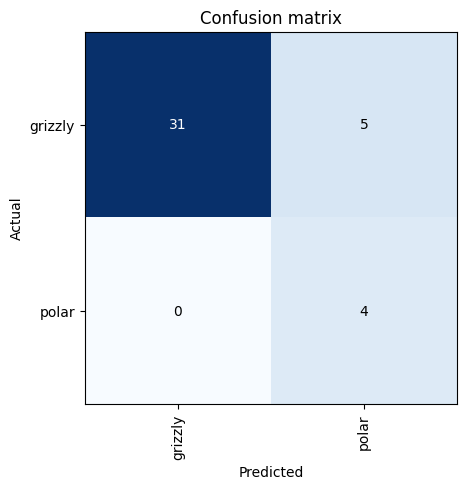

In [13]:
#Now let's see whether the mistakes the model is making are mainly thinking 
#that grizzlies are polar bears,  
#To visualize this, we can create a confusion matrix:


interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

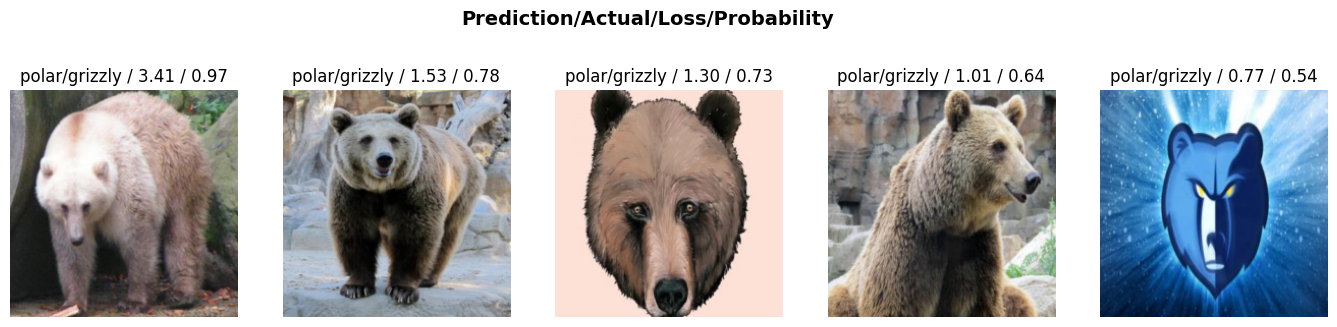

In [14]:
#The loss is a number that is higher
#if the model is incorrect (especially if it's also confident of its incorrect answer), 
#or if it's correct, but not confident of its correct answer. 
#In a couple of chapters we'll learn in depth how loss is calculated and used in the training process. 
#For now, plot_top_losses shows us the images with the highest loss in our dataset. 
#As the title of the output says, each image is labeled with four things: 
#prediction, actual (target label), loss, and probability. 
#The probability here is the confidence level, from zero to one, 
#that the model has assigned to its prediction:


interp.plot_top_losses(5, nrows=1, figsize=(17,4))


In [15]:
from fastai.vision.widgets import *
cleaner=ImageClassifierCleaner(learn)
cleaner

In [16]:
from fastai import *
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [17]:
# Export our trained Learner
# This contains all the information needed to run the model:
#learn.export('model.pkl')
#end cat learner
##################################
learn.export()

In [18]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [19]:
learn_inf = load_learner(path/'export.pkl')

In [20]:
learn_inf.predict('grizzly.jpg')

('grizzly', tensor(0), tensor([0.8990, 0.1010]))

In [21]:
learn_inf.dls.vocab

['grizzly', 'polar']

In [22]:
#grab the grizzly image
from fastai.vision.widgets import *
btn_upload = widgets.FileUpload()
btn_upload
btn_upload = SimpleNamespace(data = ['grizzly.jpg'])

In [23]:
import PIL
from fastai.vision.all import *
img = PILImage.create(btn_upload.data[-1])

In [24]:
# use an Output widget to display it:
from fastai.vision.widgets import *
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [25]:
#get our predictions
pred,pred_idx,probs = learn_inf.predict(img)

In [26]:
#use a Label to display them
from fastai.vision.widgets import *
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability: 0.8990')

In [27]:
#We'll need a button to do the classification. It looks exactly like the upload button
from fastai.vision.widgets import *
btn_run = widgets.Button(description='Classify')
btn_run

#We'll also need a click event handler; that is, a function that will be called when it's pressed. 
#We can just copy over the lines of code from above
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [28]:
#Putting back btn_upload to a widget for next cell
from fastai.vision.widgets import *
from ipywidgets import *
btn_upload = widgets.FileUpload()

#We can now put them all in a vertical box (VBox) to complete our GUI
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, lbl_pred])



In [30]:
#First install voila
#%pip install voila

#Then enable the extension for jupyteer notebook
!jupyter serverextension enable --sys-prefix voila


Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
      voila 0.5.8 OK


In [ ]:
#Show us a cat
# lets import PIL Image package
#Install the Python Image Library
#%pip install pillow
#from fastai.vision.all import *
#import PIL
#img = PILImage.create(uploader.data[0])
#img = PILImage.create(btn_upload.value[0].content.tobytes()) -- test this line out, failed
#is_cat,_,probs = learn.predict(img) 
#is_cat, _, probs = learn.predict(file) # Works
#print(f"Is this a cat?: {is_cat}.")
#print(f"Probability it's a cat: {probs[1].item():.6f}")
## end cat learner
##################################